In [1]:
import lightkurve as lk
import matplotlib.pyplot as plt
import phoebe as pb
from phoebe import u
import csv
import ellc

In [2]:
logger = pb.logger()
b = pb.load('6.bundle') #was 4
# b = pb.load('unoptimized1.bundle')
# b.add_compute('ellc', compute='fastcompute')

In [3]:
#import from graham
b.import_solution(fname="6emcee.py.out", solution="emcee_sol", overwrite=True)
# b.import_solution(fname="unoptimized1emcee.py.out", solution="emcee_sol", overwrite=True)

<ParameterSet: 23 parameters | qualifiers: autocorr_times, fitted_units, adopt_parameters, acceptance_fractions, burnin, nwalkers, distributions_convert, niters, distributions_bins, nlags, samples, adopt_values, wrap_central_values, failed_samples, progress, comments, adopt_distributions, fitted_twigs, imported_job, fitted_uniqueids, lnprob_cutoff, thin, lnprobabilities>

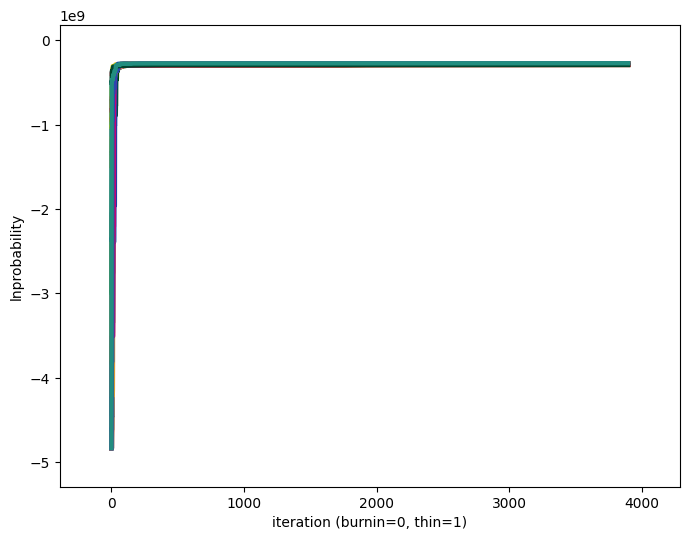

(None, <Figure size 2440x2440 with 121 Axes>)

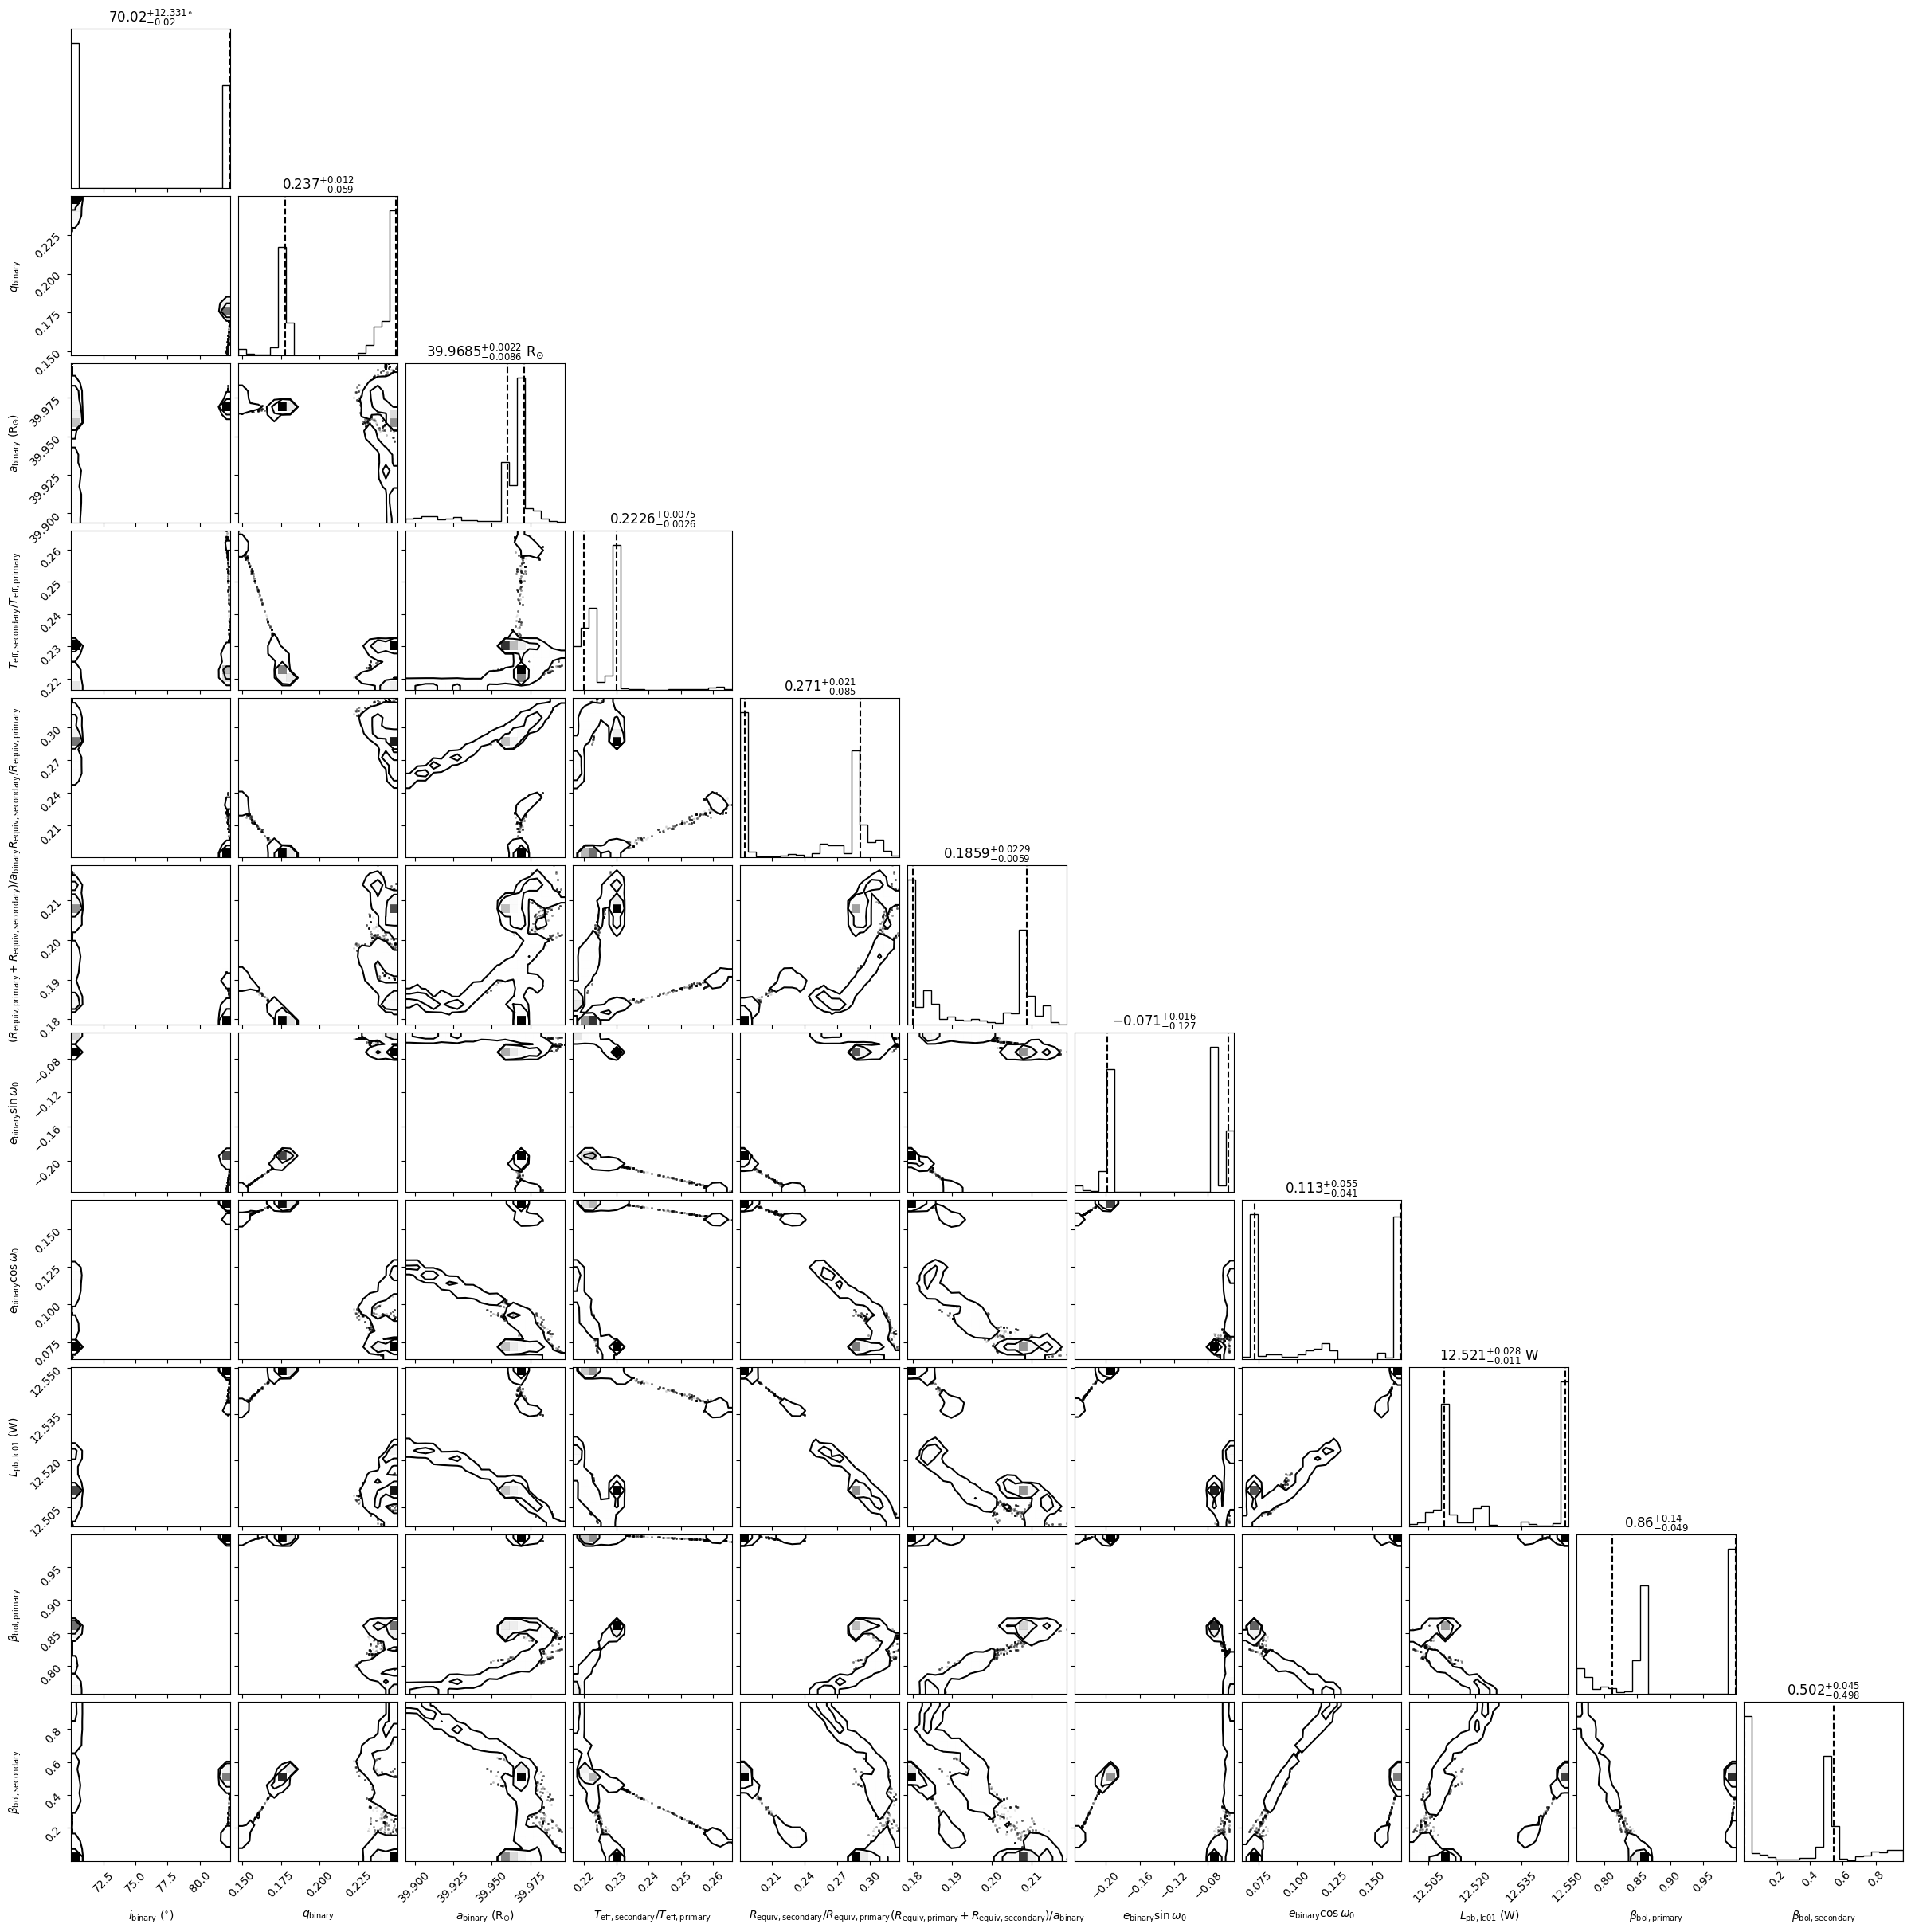

In [6]:
b.plot(solution='emcee_sol', style='lnprobability', burnin=0, show=True)#, save = "lnprob_bundle6.pdf", dpi = 1000)
# plt.show()
b.plot(solution='emcee_sol', style='corner', show=True)#, save = "cornersplot_bundle6.pdf", dpi = 1000)
# b.plot(solution='emcee_sol', style='failed', show=True)

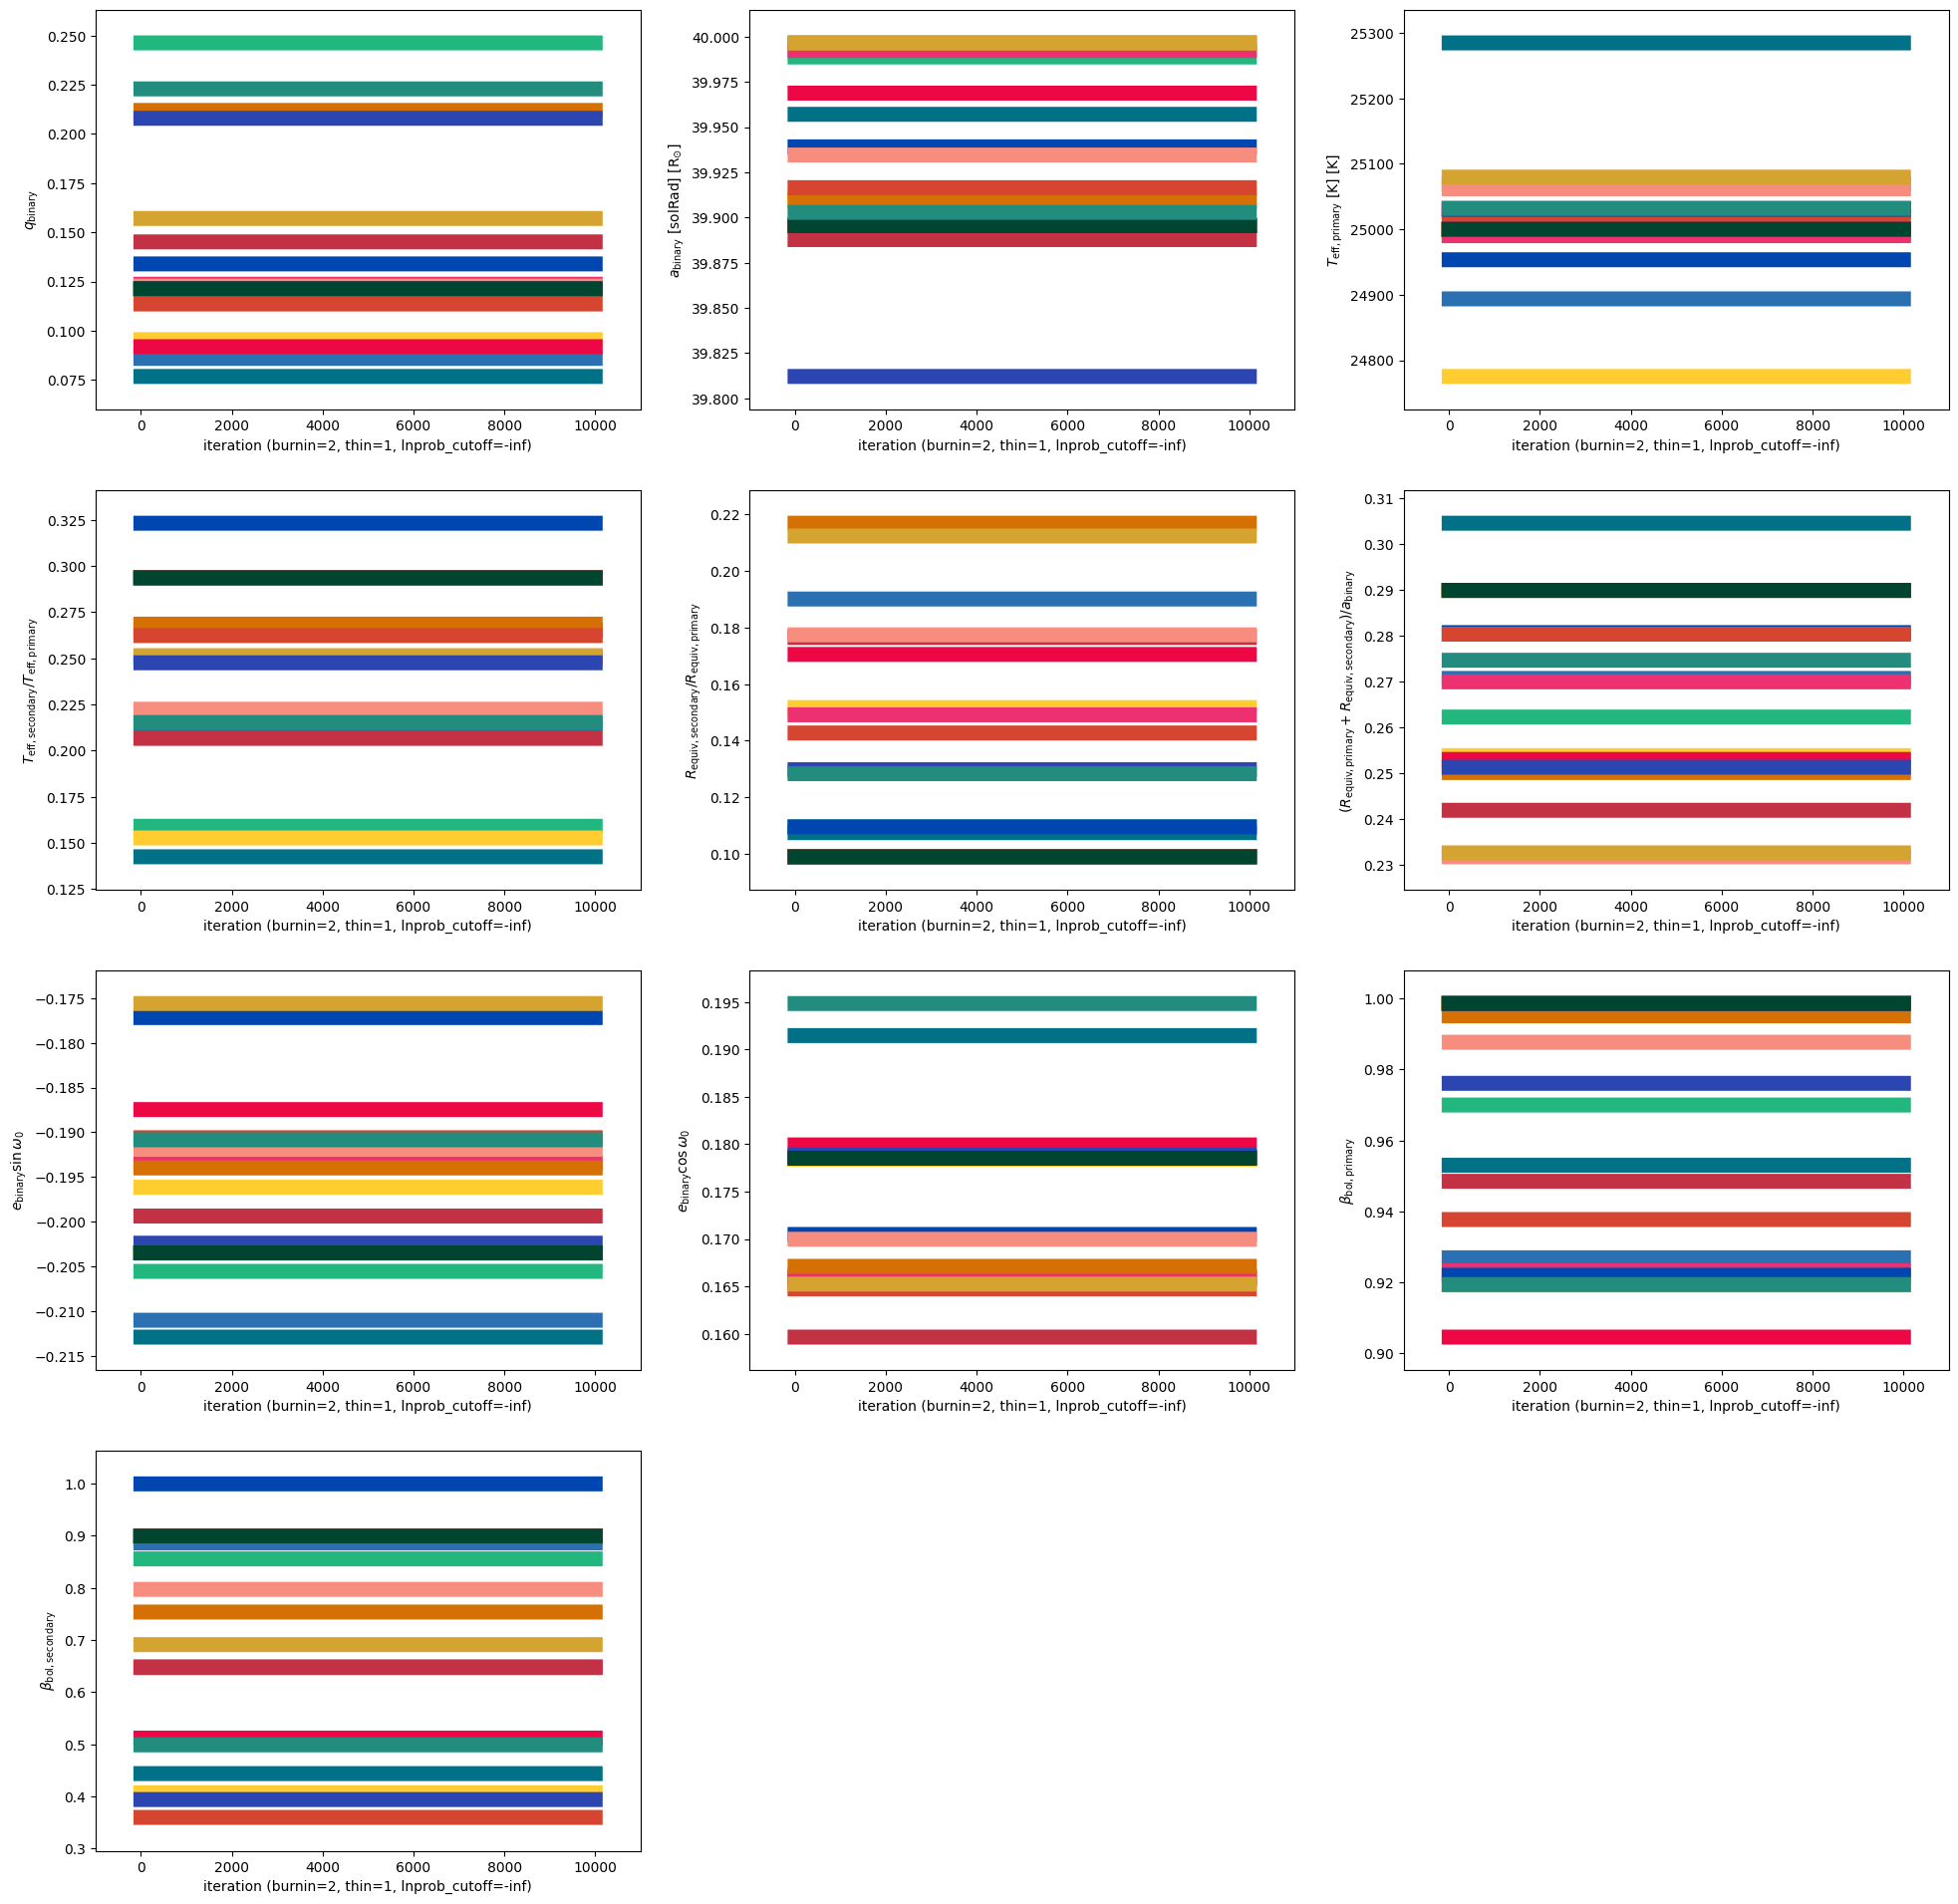

(<autofig.figure.Figure | 10 axes | 240 call(s)>,
 <Figure size 2400x2400 with 10 Axes>)

In [15]:
b.plot(solution='emcee_sol', style='trace', show=True, save = "walkersplot_bundleunopt1.pdf", dpi = 1000)

In [6]:
print(b.run_checks())

Run Checks Report: PASS



In [7]:
print(b.get_parameter('adopt_parameters', solution='emcee_sol'))

Parameter: adopt_parameters@emcee_sol@solution
                       Qualifier: adopt_parameters
                     Description: which of the parameters should be included when adopting (and plotting) the solution
                           Value: ['incl@binary@orbit@component', 'q@binary@orbit@component', 'sma@binary@orbit@component', 'teffratio@binary@orbit@component', 'requivratio@binary@orbit@component', 'requivsumfrac@binary@orbit@component', 'esinw@binary@orbit@component', 'ecosw@binary@orbit@component', 'pblum@primary@lc01@lc@dataset', 'gravb_bol@primary@star@component', 'gravb_bol@secondary@star@component']
                         Choices: incl@binary@orbit@component, q@binary@orbit@component, sma@binary@orbit@component, teffratio@binary@orbit@component, requivratio@binary@orbit@component, requivsumfrac@binary@orbit@component, esinw@binary@orbit@component, ecosw@binary@orbit@component, pblum@primary@lc01@lc@dataset, gravb_bol@primary@star@component, gravb_bol@secondary@star

In [10]:
print(b.get_parameter('burnin_factor', solver='emcee_solver'))

ValueError: 0 results found for twig: 'burnin_factor', {'solver': 'emcee_solver', 'check_visible': True, 'check_default': True, 'check_advanced': False, 'check_single': False}

In [11]:
b.run_compute(compute='fastcompute', sample_from = "emcee_sol", model = 'firstemcee')

Thu, 11 Jan 2024 14:01 PASSBANDS    WARNING Online passbands unavailable (reached max tries).  Pass refresh=True to force another attempt or repeat_errors=False to avoid showing this message.
Thu, 11 Jan 2024 14:01 PASSBANDS    WARNING Online passbands unavailable (reached max tries).  Pass refresh=True to force another attempt or repeat_errors=False to avoid showing this message.
  0%|                                                                                                                                                             | 0/10 [00:00<?, ?it/s]

KeyboardInterrupt: 

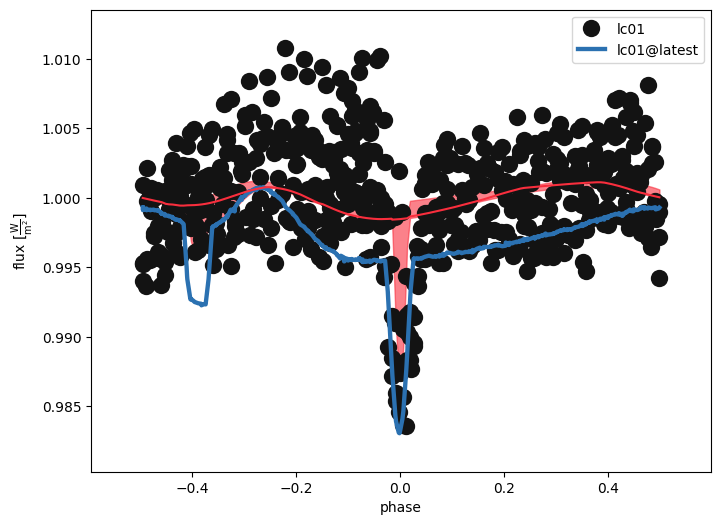

(<autofig.figure.Figure | 1 axes | 3 call(s)>,
 <Figure size 800x600 with 1 Axes>)

In [12]:
b.plot(x='phases', 
           linestyle={'model': 'solid'},
           color={'firstemcee': 'red', 'emcee_sol': 'green'},
           show=True, legend=True)

In [13]:
print(b.filter(qualifier=['burnin', 'thin', 'lnprob_cutoff', 'autocorr_times']))

ParameterSet: 4 parameters
R  autocorr_times@emcee_sol@so...: [169.10982642 212.766708   334.07793867 426.24339793 311.86128359
 255.59005178 207.7826527  464.1094181  331.70888281 355.41688423
 465.01278285]
        burnin@emcee_sol@solution: 930
          thin@emcee_sol@solution: 1
   lnprob_cutoff@emcee_sol@sol...: -inf


In [14]:
print(b.get_parameter('distributions_convert', solution='emcee_sol'))

Parameter: distributions_convert@emcee_sol@solution
                       Qualifier: distributions_convert
                     Description: type of distribution to use when calling adopt_solution, get_distribution_collection, or plot. mvsamples: chains are stored directly and used for sampling with a KDE generated on-the-fly to compute probabilities.  mvhistogram: chains are binned according to distributions_bins and stored as an n-dimensional histogram.  mvgaussian: a multivariate gaussian is fitted to the samples, use only if distribution is sufficiently represented by gaussians.  samples: a univariate representation of mvsamples.  histogram: a univariate representation of mvhistogram.  gaussian: a univariate representation of mvgaussian.
                           Value: mvsamples
                         Choices: mvsamples, mvhistogram, mvgaussian, samples, histogram, gaussian
                  Constrained by: 
                      Constrains: None
                      Related 

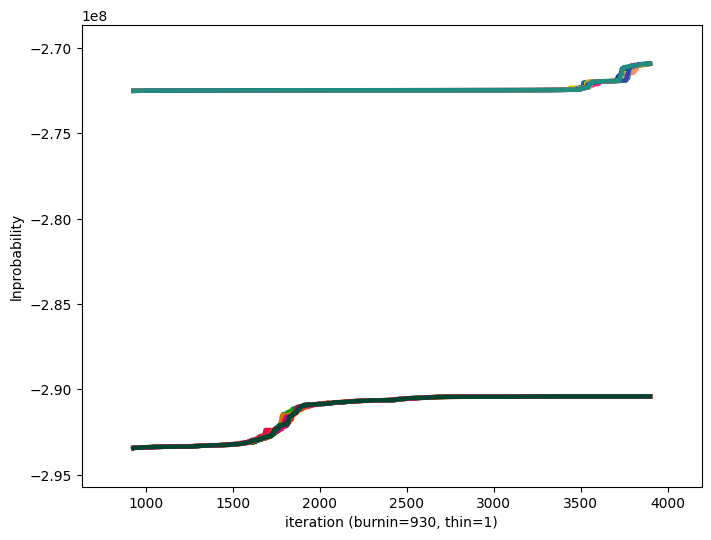

(<autofig.figure.Figure | 1 axes | 24 call(s)>,
 <Figure size 800x600 with 1 Axes>)

In [15]:
b.plot(solution='emcee_sol', style='lnprobability', show=True)

In [18]:
b.run_compute(compute='fastcompute', sample_from='emcee_sol', 
              sample_num=20, model='emcee_sol_model')

Mon, 21 Aug 2023 11:55 PASSBANDS    WARNING Online passbands unavailable (reached max tries).  Pass refresh=True to force another attempt or repeat_errors=False to avoid showing this message.
100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:16<00:00,  1.20it/s]


Connection to online passbands at http://tables.phoebe-project.org could not be established.  Check your internet connection or try again later (can manually call phoebe.list_online_passbands(refresh=True) to retry).  If the problem persists and you're using a Mac, you may need to update openssl (see http://phoebe-project.org/help/faq). Original error from urlopen: TimeoutError timed out
Connection to online passbands at http://tables.phoebe-project.org could not be established.  Check your internet connection or try again later (can manually call phoebe.list_online_passbands(refresh=True) to retry).  If the problem persists and you're using a Mac, you may need to update openssl (see http://phoebe-project.org/help/faq). Original error from urlopen: TimeoutError timed out
Connection to online passbands at http://tables.phoebe-project.org could not be established.  Check your internet connection or try again later (can manually call phoebe.list_online_passbands(refresh=True) to retry).  

<ParameterSet: 8 parameters | qualifiers: failed_samples, sampled_uniqueids, times, comments, fluxes, samples, sample_mode, sampled_twigs>

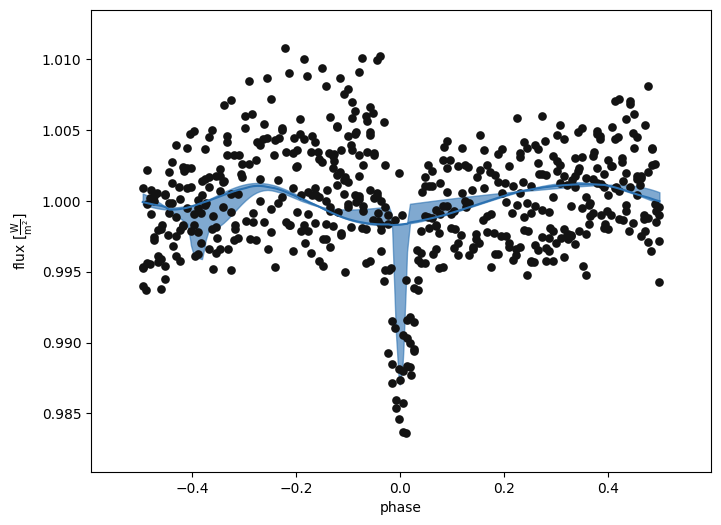

(<autofig.figure.Figure | 1 axes | 2 call(s)>,
 <Figure size 800x600 with 1 Axes>)

In [20]:
b.plot(dataset='lc01', x='phases', 
           marker={'dataset': '.'},
           model='emcee_sol_model', show=True)

In [22]:
print(b.get_parameter('adopt_values', solution='emcee_sol'))
print(b.get_parameter('adopt_distributions', solution='emcee_sol'))

Parameter: adopt_values@emcee_sol@solution
                       Qualifier: adopt_values
                     Description: whether to update the parameter face-values (of the means of all parameters in adopt_parameters) when calling adopt_solution.
                           Value: True
                  Constrained by: 
                      Constrains: None
                      Related to: None

Parameter: adopt_distributions@emcee_sol@solution
                       Qualifier: adopt_distributions
                     Description: whether to create a distribution (of all parameters in adopt_parameters according to distributions_convert) when calling adopt_solution.
                           Value: True
                  Constrained by: 
                      Constrains: None
                      Related to: None



In [26]:
# print(b.adopt_solution('emcee_sol', trial=True))
b.adopt_solution('emcee_sol')

<ParameterSet: 44 parameters | contexts: component, dataset, distribution>

In [25]:
print(b.solvers, b.solutions)
print(b.filter('init_from@emcee_solver@solver'))
# print(b.get_parameter(qualifier='init_from', solver='emcee_solver'))
# print(b.get_parameter(qualifier='continue_from', solver='emcee_solver'))

['emcee_solver'] ['emcee_sol']
ParameterSet: 0 parameters
NO PARAMETERS


In [23]:
b.save("6.2.bundle")

'6.2.bundle'

In [24]:
b.set_value(qualifier='continue_from', value='emcee_sol')

ValueError: 0 results found for twig: 'None', {'qualifier': 'continue_from', 'check_visible': True, 'check_default': True, 'check_advanced': False, 'check_single': False}

In [14]:
b.add_compute('ellc', compute='fastcompute', overwrite=True)
b.add_solver('optimizer.nelder_mead', solver='nm_solver', overwrite=True)
b.remove_solver(solver='nm_solver')
# b.set_value('compute', solver='nm_solver', value='fastcompute')

<ParameterSet: 14 parameters | qualifiers: fit_parameters, compute, maxiter, xatol, initial_values, priors, comments, priors_combine, adaptive, progress_every_niters, expose_lnprobabilities, use_server, fatol, continue_from>

In [21]:
b.set_value('maxiter', 10)
b.set_value('fit_parameters', ['incl@binary','q@binary','sma@binary', 'teff@primary', 
                               'teffratio@binary', 'requivratio@binary', 'requivsumfrac@binary', 
                               'esinw@binary', 'ecosw@binary', 'gravb_bol@primary', 'gravb_bol@secondary', 
                               'irrad_frac_refl_bol@primary','irrad_frac_refl_bol@secondary'])

In [23]:
b.run_solver('nm_solver', solution='nm_sol')

Mon, 14 Aug 2023 15:14 BUNDLE       WARNING 'primary' probably has a radiative atm (teff=25079K>8000K), for which gravb_bol>=0.9 might be a better approx than gravb_bol=0.89.
Mon, 14 Aug 2023 15:14 BUNDLE       WARNING 'secondary' has intermittent temperature (6600K<teff=6824K<8000K), irrad_frac_refl_bol might be better between 0.6-1.00 than irrad_frac_refl_bol=0.41.
  0%|                                                                                                                                                                                                                                                                                           | 0/10 [00:00<?, ?it/s]Mon, 14 Aug 2023 15:14 BUNDLE       WARNING 'primary' probably has a radiative atm (teff=25079K>8000K), for which gravb_bol>=0.9 might be a better approx than gravb_bol=0.89.
Mon, 14 Aug 2023 15:14 BUNDLE       WARNING 'secondary' has intermittent temperature (6600K<teff=6824K<8000K), irrad_frac_refl_bol might be bett

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:07<00:00,  1.40it/s]


<ParameterSet: 11 parameters | qualifiers: fitted_units, message, niter, fitted_twigs, fitted_values, success, adopt_values, adopt_parameters, initial_values, adopt_distributions, comments>

In [24]:
b.run_compute(compute='fastcompute', sample_from='nm_sol', model='optimizer', overwrite=True)

Mon, 14 Aug 2023 15:18 BUNDLE       WARNING 'primary' probably has a radiative atm (teff=25079K>8000K), for which gravb_bol>=0.9 might be a better approx than gravb_bol=0.89.
Mon, 14 Aug 2023 15:18 BUNDLE       WARNING 'secondary' has intermittent temperature (6600K<teff=6824K<8000K), irrad_frac_refl_bol might be better between 0.6-1.00 than irrad_frac_refl_bol=0.41.
Mon, 14 Aug 2023 15:18 BUNDLE       WARNING all distributions are delta, using sample_size=1 instead of sample_size=10
100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:23<00:00,  2.36s/it]


<ParameterSet: 9 parameters | qualifiers: sample_mode, fluxes, samples, times, failed_samples, sampled_twigs, flux_scale, comments, sampled_uniqueids>

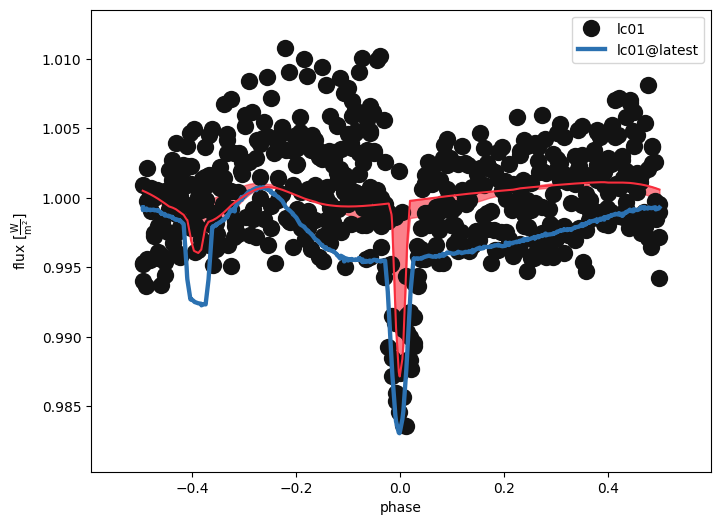

(<autofig.figure.Figure | 1 axes | 3 call(s)>,
 <Figure size 800x600 with 1 Axes>)

In [28]:
print(b.adopt_solution(solution='nm_sol'))

ParameterSet: 21 parameters
            incl@binary@component: 77.79902178626753 deg
               q@binary@component: 0.0006180667985097286
             sma@binary@component: 39.99984060333556 solRad
           teff@primary@component: 25079.017711583256 K
       teffratio@binary@component: 0.2720833010843676
     requivratio@binary@component: 0.10608922704482313
   requivsumfrac@binary@component: 0.3191874467570435
           esinw@binary@component: -0.21709659354738614
           ecosw@binary@component: 0.18860275472032134
      gravb_bol@primary@component: 0.8899618179473922
    gravb_bol@secondary@component: 0.9341668147275819
   irrad_frac_refl_bol@primary...: 0.9616450673666878
   irrad_frac_refl_bol@seconda...: 0.4063369807848848
C           per0@binary@component: 310.9824923537534 deg
C            ecc@binary@component: 0.2875794325364258
C     t0_perpass@binary@component: 1627.1246234533896 d
C         t0_ref@binary@component: 1623.471046246474 d
C    requiv_max@primary@compon

In [29]:
b.save('4emcee.bundle')

'4emcee.bundle'

In [30]:
print('done')

done


In [15]:
b.set_value(qualifier='continue_from', value='emcee_sol')
# print(b.filter(solver='nm_solver', context='solver'))

ValueError: 0 results found for twig: 'None', {'qualifier': 'continue_from', 'check_visible': True, 'check_default': True, 'check_advanced': False, 'check_single': False}

In [17]:
b.add_solver('sampler.emcee', solver='emcee_solver', overwrite=True)
b.set_value(qualifier='niters', solver='emcee_solver', context='solver', value=50)
b.set_value(qualifier='continue_from', value='emcee_sol')
b.run_solver('emcee_solver', solution='emcee_sol_contd')

Mon, 14 Aug 2023 16:09 BUNDLE       WARNING 'primary' probably has a radiative atm (teff=25079K>8000K), for which gravb_bol>=0.9 might be a better approx than gravb_bol=0.89.
Mon, 14 Aug 2023 16:09 BUNDLE       WARNING 'secondary' has intermittent temperature (6600K<teff=6824K<8000K), irrad_frac_refl_bol might be better between 0.6-1.00 than irrad_frac_refl_bol=0.41.
Mon, 14 Aug 2023 16:09 BUNDLE       WARNING sampling with dataset-scaled can cause unintended issues.  Consider using component-coupled and marginalizing over pblum
Start
-0.01039293330480569 0.003627328890163464 0.02793436342850019
-347.7572710438951 131.055708358118 1055.935655059549
0.3219837592130261
End
-0.01031467488449428 0.00361637915875168 0.02765938341424243
-356.1767009333712 134.5279898453302 1075.124323475809
-2.273736754432321e-13
Start
-0.01120493123578053 -0.006548306156405288 0.02408603932532067
-478.127610006203 -313.0978040151285 1215.963898825391
0.3544425753225369
End
-0.01111985593775671 -0.0065076814

  0%|                                                                                                                                                                                                                                                                                           | 0/50 [00:00<?, ?it/s]Warning: Projection did not converge
Start
0.01406295770777841 -0.003930524484745456 0.02635231806029632
467.0590090864982 -140.7747857394328 987.2963105095454
0.3185501033342462
End
0.01395014686111342 -0.003916933905551469 0.02608799129948191
478.0948790345839 -144.4394337082201 1005.04288313008
2.273736754432321e-13
Start
-0.01681965396628124 -0.003497595355850763 0.02268887309372711
-647.5480531480803 -148.6496499148342 1013.788479829834
0.3129083581020495
End
-0.0167010580537701 -0.003466298881085435 0.0224633117148692
-662.7176320106777 -151.4161890264302 1030.258236930983
-2.273736754432321e-13
Start
-0.003737240785248798 0.01389366886387247 0.02572026841932416
-131.1728532

Start
-0.01581983735778063 0.007112683469676044 0.02475457201037736
-519.6370276848196 251.7897398827836 916.8248545819855
0.3002408943821138
End
-0.0157086226449226 0.007047372554196916 0.02451100552137728
-531.6846961805782 256.521210798537 932.3014647437196
-2.273736754432321e-13
  2%|█████▎                                                                                                                                                                                                                                                                   | 1/50 [17:50:24<874:09:50, 64224.29s/it]


KeyboardInterrupt: 